In [41]:
import numpy as np 
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from shutil import copy2

# Matplotlib options
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.grid'] = False
plt.style.use('seaborn-deep')

# Pandas setup
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', -1) 

In [42]:
# Read file
path = "./Tidy_Entities/"
name = "p1"
filename = name + ".csv"
df = pd.read_csv(path + filename, encoding='utf8')

# Transformations
df["DATE"] =  pd.to_datetime(df["DATE"], format="%Y-%m-%d")
df = df.sort_values("DATE").set_index("DATE")
df.drop(columns=["ENTIDADE"], inplace=True)
df.head(2)

,ALUMÍNIO,ARSÊNIO,BORO,BÁRIO,CHUMBO,CIANETO,COBALTO,COBRE,COLIFORMES_TERMOTOLERANTES,COR_VERDADEIRA,CROMO,CROMO_HEXAVALENTE,CÁDMIO,DBO,DQO,ESTANHO,FENOL,FERRO,FLUORETO,FÓSFORO,LÍTIO,MANGANÊS,MERCÚRIO,MOLIBDÊNIO,NITROGÊNIO,NITROGÊNIO_AMONIACAL,NITROGÊNIO_KJELDAHL,NÍQUEL,PH,PRATA,SURFACTANTES,SÓLIDOS,ÍNDICE_DE_FENÓIS,ÓLEOS
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.267,0.007,NaN,0.034,NaN,NaN,NaN,NaN,1986300.0,NaN,185.0,NaN,NaN,NaN,170.0,480.0,NaN,NaN,NaN,2.43,0.001,0.154,NaN,0.002,NaN,70.2,NaN,0.030,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,0.531,NaN,NaN,0.034,NaN,NaN,NaN,0.024,1011200.0,NaN,1050.0,0.001,NaN,NaN,280.0,734.0,NaN,0.019,0.041,2.11,0.003,0.125,0.043,0.006,NaN,73.0,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
ordered_columns = df.isnull().sum().sort_values(ascending=True).index
df_ordered = df[ordered_columns]
df_ordered["YEAR"] = [timestamp.year for timestamp in df_ordered.index]
df_ordered.head(2)

,COLIFORMES_TERMOTOLERANTES,DQO,FÓSFORO,NITROGÊNIO,SURFACTANTES,PH,DBO,ÓLEOS,SÓLIDOS,COR_VERDADEIRA,MANGANÊS,ALUMÍNIO,BÁRIO,COBRE,FERRO,NITROGÊNIO_AMONIACAL,NÍQUEL,LÍTIO,CROMO,FLUORETO,COBALTO,BORO,MOLIBDÊNIO,ARSÊNIO,NITROGÊNIO_KJELDAHL,ESTANHO,CROMO_HEXAVALENTE,CHUMBO,CÁDMIO,MERCÚRIO,CIANETO,FENOL,PRATA,ÍNDICE_DE_FENÓIS,YEAR
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1986300.0,170.0,2.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154,0.267,0.034,NaN,NaN,70.2,0.030,0.001,185.0,NaN,NaN,NaN,0.002,0.007,NaN,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
2012-03-01,1011200.0,280.0,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125,0.531,0.034,0.024,0.019,73.0,0.003,0.003,1050.0,0.041,NaN,NaN,0.006,NaN,NaN,734.0,0.001,NaN,NaN,0.043,NaN,NaN,NaN,NaN,2012


## Análise Temporal

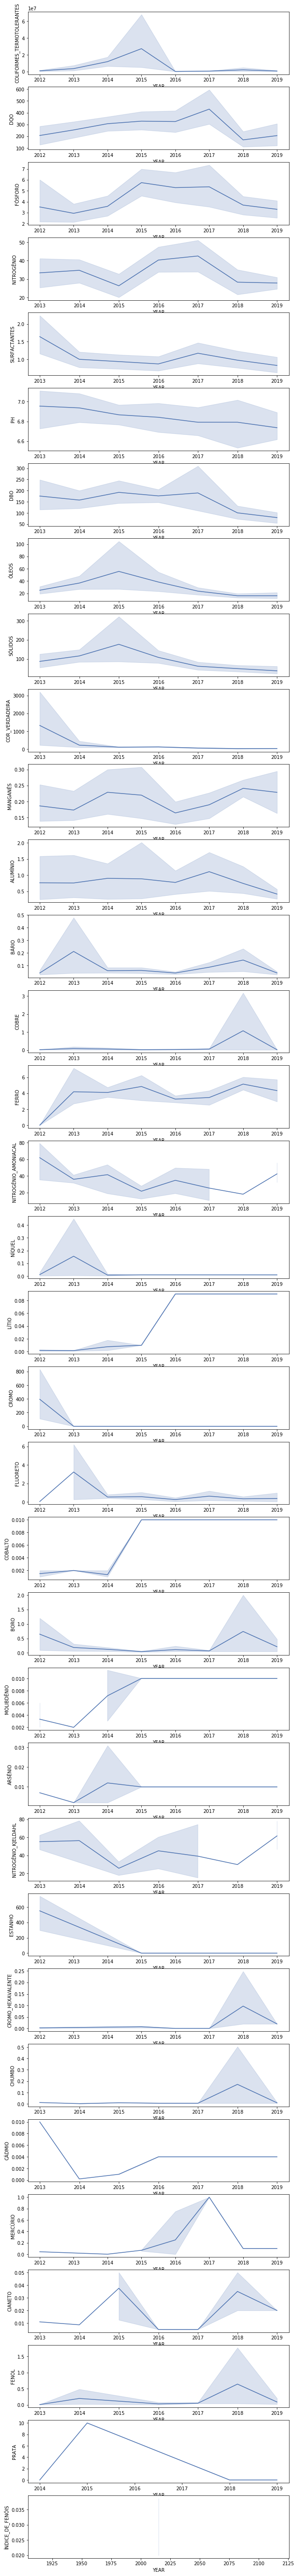

In [60]:
cols = df_ordered.columns[:-1]
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(100)

for key, col in enumerate(cols):
    sns.lineplot(data=df_ordered, x="YEAR", y=col, ax=axs[key]);
    # plt.title(f"Série Histórica Anual - {str(col).capitalize()}");